# How do you say "šikmý vrh" in English?

*This notebook shows the process to arrive at a solution. It does NOT represent a good notebook. It contains various variants for you to see, instead of replacing the code in each cell with the new version. That is because here we focus on the process, you are supposed to read it sequentially and learn from the mistakes, which are intentionally left there. A proper final notebook would be much cleaner, as you can see in the example at *

oday we create a more serious sample project in Jupyter notebook. It will follow a vary basic workflow: take inputs, generate data, visualize the results, come to a conclusion. You may reuse the same pattern in the future for you lab works and such.

Think back to physics (and sports) and throwing things.
* What influences the trajectory?
* What determines the final distance?
* How do you determine the position of the thing, based on the previous position?

Feel free to scribble a few figures!

## The question: at what angle do I need to throw the thing, to make it fly the furthest?

We need to model the whole process. What are the key variables? Let' define them!

In [1]:
import math

G = -9.81  # Gravity
v0 = 50.0  # Initial velocity (m/s)
angle = math.radians(75) # Degrees
# what else?

# starting point
x0, y0 = 0, 100

When in need, use the documentation. Or just try finding a page that contains your question and answer (it has been asked many times before!). So, how do we calculate sines and cosines in Python?

Remember how to load new functions?

Check the partial results - do they match your expectations? Or should we change something?

Now finally, run the simulation. Proceed step-wise in a loop. In each step you calculate the new position (and possibly some other quantities).

In [2]:
def sim(x, y, v0, angle):
    angleRad = math.radians(angle)
    vx = v0 * math.cos(angleRad)
    vy = v0 * math.cos(math.pi/2-angleRad)
    trajectory_x = []
    trajectory_y = []
    while y >= 0:
        trajectory_x.append(x)
        trajectory_y.append(y)
        x += vx
        y += vy
        vy += G

    return trajectory_x, trajectory_y


In [8]:
angles = list(range(40, 50, 1))

trs = []
for angle in angles:
    trs.append(sim(x0, y0, v0, angle))



We have the list of coordinates. Now the grand finale: we plot it.

In [4]:
import matplotlib.pyplot as plt


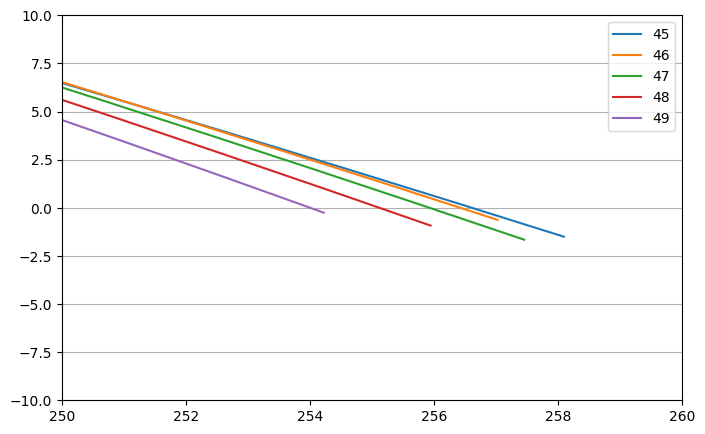

In [20]:
"""
plt.figure(figsize=(8, 5))
plt.plot(trajectory_x, trajectory_y, label="Trajectory")
plt.plot(tx,ty, label="T")
plt.show()"""
dt=0.05
plt.figure(figsize=(8, 5))
for angle in angles[5:10]:
    angleRad = math.radians(angle)
    x, y = 0, 0
    vx = v0 * math.cos(angleRad)
    vy = v0 * math.cos(math.pi/2-angleRad)
    trajectory_x = []
    trajectory_y = []
    while y >= 0:
        trajectory_x.append(x)
        trajectory_y.append(y)
        x = x + vx*dt
        y += vy*dt
        vy += G*dt
    trajectory_x.append(x)
    trajectory_y.append(y)
    plt.plot(trajectory_x[:], trajectory_y[:], label=str(angle))
plt.legend()
plt.xlim(250,260)
plt.ylim(-10,10)
plt.grid(axis='y')  # Add grid lines only along the x-axis
plt.show()

Find out possibilities to vyňuňat the chart. And do it. Labels, grids, colors...

**And finally, edit the notebook however you need to find out the answer to the original question.**

Possible modification: we do not shoot on the ground, but from a tower of some height.

### Sidequest
**bold text**

*You may skip section this if you don't feel like it. But this is what happens when exploring the world through data, so I decided to leave it here.*

That last observation suggests a symmetry. I can not help it, I want to see it. I will estimate the final range for each angle very roughly. The last coordinate in each trajectory is the first under ground level. Taking the average of the last two points should be close to the point of impact.

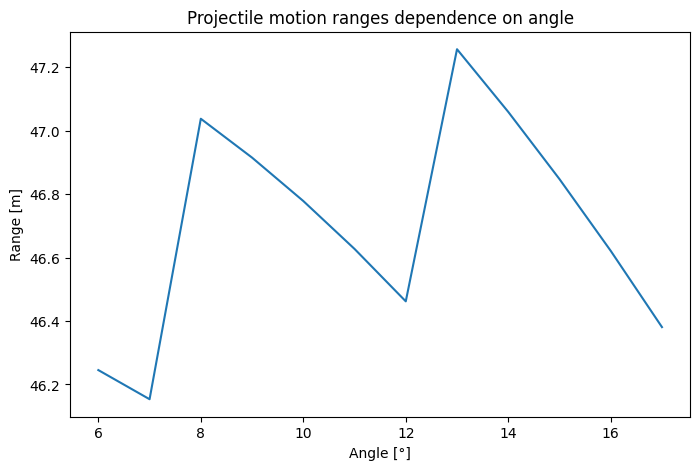

In [ ]:
angles=[]
ranges=[]
for result in results:
    angles.append(result[2])
    ranges.append(sum(result[0][-2:])/2)
plt.figure(figsize=(8, 5))
plt.plot(angles, ranges)
plt.title("Projectile motion ranges dependence on angle")
plt.xlabel("Angle [°]")
plt.ylabel("Range [m]")
plt.show()

Well this is weird. It seems like taking the average of the two coordinates is not a good estimatte. Maybe we should interpolate properly. Name the two points $A$ and $B$ and assume linear motion on that short segment. Instead of the middle we take a proportion. The ratio of the differences in coordinates gives us the slope, which allows us to calculate the change in the coordinates. The standard form is for $y$:

$y = y_A + \frac{(y_B - y_A)}{(x_B - x_A)} (x - x_A)$

The point of impact is at $y=0$ and we need to find $x$, leading to:

$x = x_A - \frac{y_A (x_B - x_A)}{y_B - y_A}​$

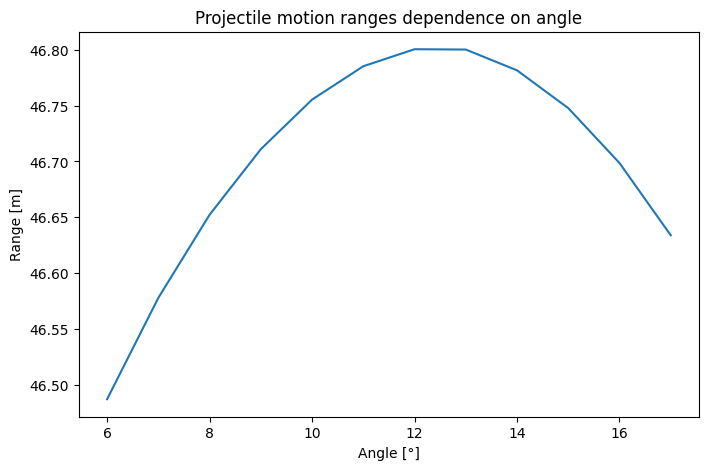

In [ ]:
angles=[]
ranges=[]
for result in results:
    angles.append(result[2])
    x_A, x_B = result[0][-2:]
    y_A, y_B = result[1][-2:]
    ranges.append(x_A-y_A*(x_B-x_A)/(y_B-y_A))
plt.figure(figsize=(8, 5))
plt.plot(angles, ranges)
plt.title("Projectile motion ranges dependence on angle")
plt.xlabel("Angle [°]")
plt.ylabel("Range [m]")
plt.show()

Intellectual satisfaction aside, we can now be more confident in our estimate of the optimal angle.

In [4]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
@widgets.interact(x=(0, 10))
def update(x=5):
    plt.plot([0, x], [0, x**2])
    plt.xlim(0, 10)
    plt.ylim(0, 100)
    plt.show()

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interaktivní graf asi: https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab

https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets